# TASK_9
## Hand written equation solver
### Done by : Nammi Divya Deepika

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!unzip -q "/content/drive/MyDrive/lgm.zip"

warning [/content/drive/MyDrive/lgm.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [/content/drive/MyDrive/lgm.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #179974).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [21]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

import pickle

In [22]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data


In [23]:
data=[]
data=load_images_from_folder('/content/lgm/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])

print(len(data))

33997


In [24]:
data11=load_images_from_folder('/content/lgm/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [25]:
data0=load_images_from_folder('/content/lgm/0')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

66023


In [26]:
data1=load_images_from_folder('/content/lgm/1')
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

92543


In [27]:
data2=load_images_from_folder('/content/lgm/2')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

118684


In [28]:
data3=load_images_from_folder('/content/lgm/3')
for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

129593


In [29]:
data4=load_images_from_folder('/content/lgm/4')
for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

136989


In [30]:
data5=load_images_from_folder('/content/lgm/5')
for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

140534


In [31]:
data6=load_images_from_folder('/content/lgm/6')
for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

143652


In [32]:
data7=load_images_from_folder('/content/lgm/7')
for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

146561


In [33]:
data8 = load_images_from_folder('/content/lgm/8')
for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

149629


In [34]:
data9 = load_images_from_folder('/content/lgm/9')
for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

153366


In [35]:
data12 = load_images_from_folder('/content/lgm/X')
for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

179960


In [36]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

In [37]:
data = pd.read_csv('/content/train_handwritten.csv',index_col=False)
labels = data[['784']]

In [38]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,32,255,168,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [40]:
labels=np.array(labels)

In [41]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [42]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [43]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,32,255,168,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data.shape

(179960, 784)

In [45]:
temp=data.to_numpy()

In [46]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [47]:
temp.shape[0]

179960

In [48]:
X_train.shape

(179960, 28, 28, 1)

In [49]:
l=[]
for i in range(14326):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

In [50]:
np.random.seed(7)

In [51]:
len(l[0])

1

In [52]:
X_train.shape

(179960, 28, 28, 1)

In [53]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

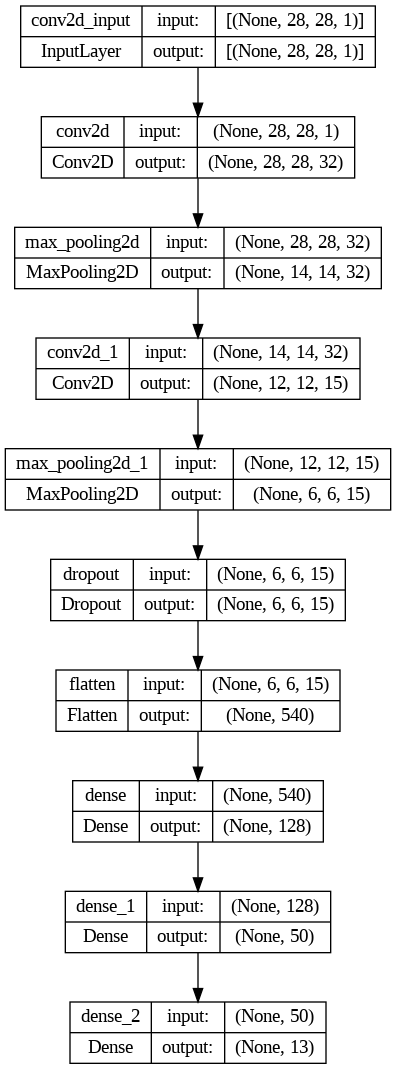

In [55]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [56]:
model.fit(X_train, cat, epochs=20, batch_size=200,shuffle=True,verbose=1)

Epoch 1/20
900/900 [==============================] - 144s 158ms/step - loss: 0.4525 - accuracy: 0.8919
Epoch 2/20
900/900 [==============================] - 146s 162ms/step - loss: 0.0811 - accuracy: 0.9769
Epoch 3/20
900/900 [==============================] - 140s 156ms/step - loss: 0.0514 - accuracy: 0.9851
Epoch 4/20
900/900 [==============================] - 137s 152ms/step - loss: 0.0368 - accuracy: 0.9895
Epoch 5/20
900/900 [==============================] - 141s 157ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 6/20
900/900 [==============================] - 137s 152ms/step - loss: 0.0260 - accuracy: 0.9921
Epoch 7/20
900/900 [==============================] - 139s 154ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 8/20
900/900 [==============================] - 136s 152ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 9/20
900/900 [==============================] - 139s 154ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 10/20
900/900 [==============================] - 139s 155m

In [57]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.h5")

In [60]:
import cv2
import numpy as np
img = cv2.imread('1x4.jpg',cv2.IMREAD_GRAYSCALE)


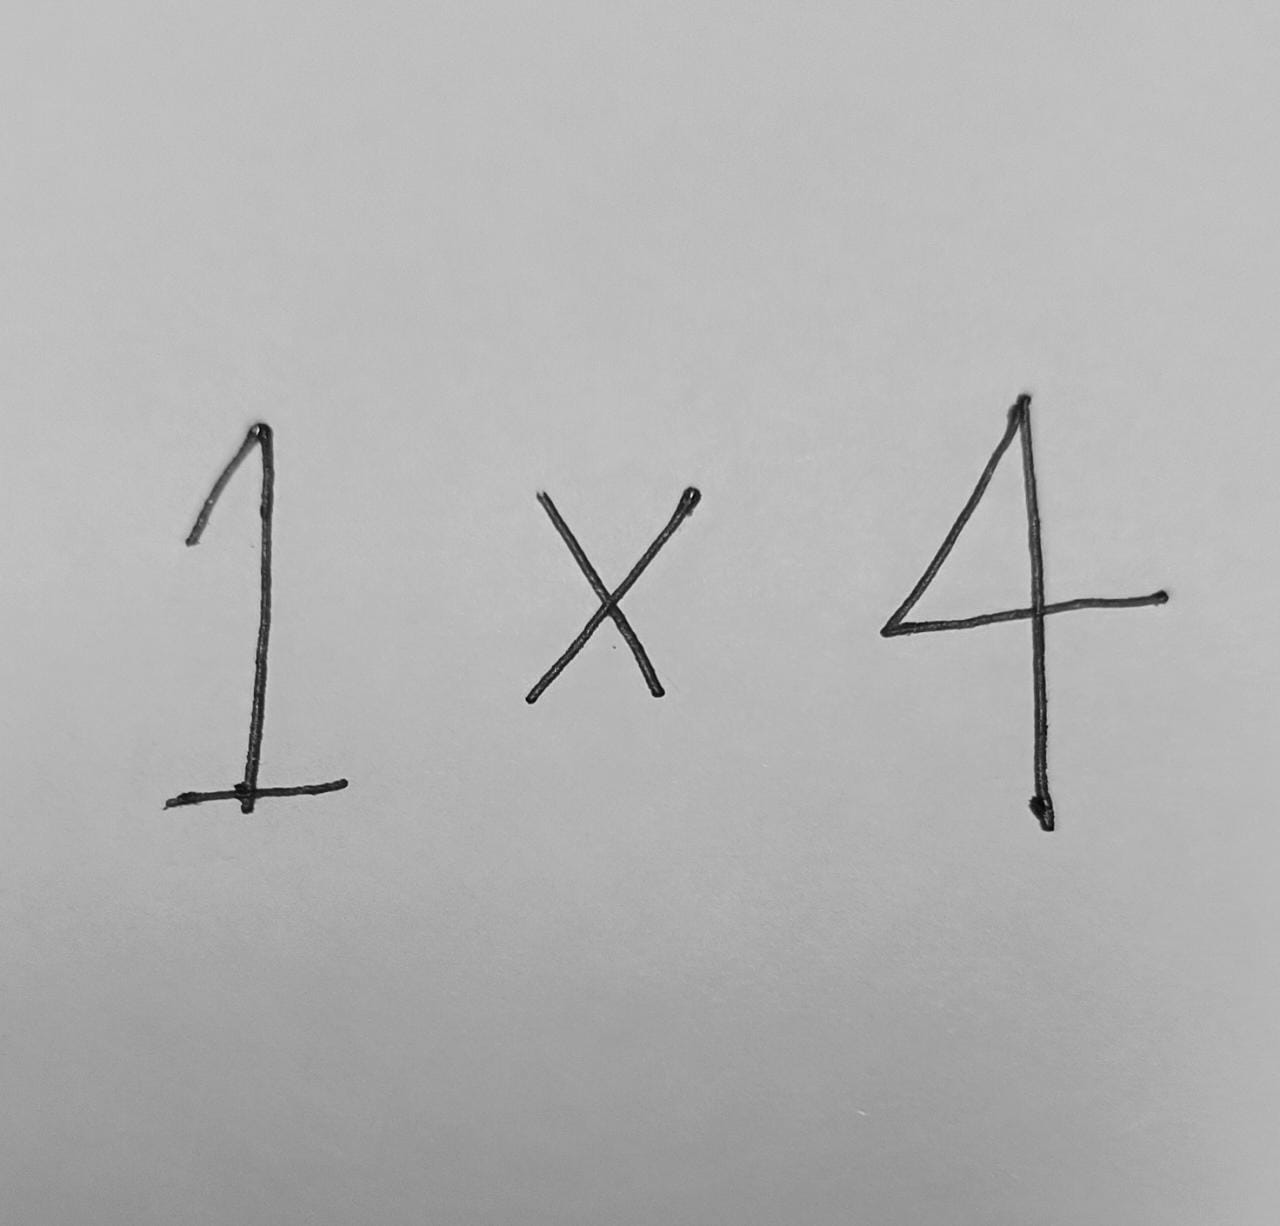

In [61]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)


In [62]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect))
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

31
[[163, 422, 185, 392], [208, 499, 6, 5], [255, 704, 4, 5], [255, 426, 5, 9], [259, 646, 4, 4], [263, 551, 3, 5], [525, 486, 176, 218], [535, 690, 3, 3], [552, 671, 3, 3], [554, 668, 3, 5], [578, 555, 3, 3], [580, 639, 3, 3], [587, 629, 3, 4], [590, 576, 4, 5], [591, 623, 3, 3], [597, 588, 5, 5], [604, 607, 3, 3], [613, 647, 3, 1], [644, 666, 3, 4], [663, 533, 5, 4], [676, 515, 4, 4], [689, 491, 5, 8], [880, 394, 289, 438], [898, 425, 135, 200], [926, 578, 3, 4], [931, 570, 3, 3], [1032, 522, 4, 4], [1035, 574, 3, 3], [1039, 772, 3, 3], [1040, 709, 3, 4], [1044, 800, 4, 6]]
[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'

1/1 [==============================] - 0s 34ms/step


In [64]:
print(equation)

1*4


In [65]:
eval(equation)

4